In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import dataframe_image as dfi
#Dependencies
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer




In [3]:
from main_function import clean_data

In [4]:
xl = "C:\\Users\\zachi\\Desktop\\final_project_22\\data_nov_21.xlsx"



first_day = '2021-11-1'
last_day = '2021-11-30'

new_df = clean_data (xl,first_day,last_day)


c:\Users\zachi\FOA-TAU-Data-analysis-project\report for media\main_function.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  posts_description=posts_description.str.lower().str.replace('[^\w\s]','')


Grpuping the content through the web by time

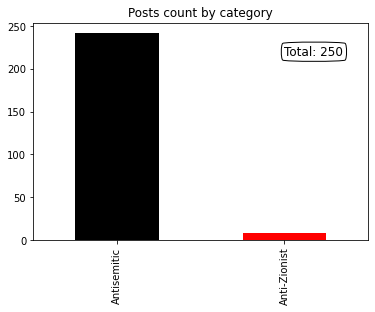

In [15]:

post_count_by_category = new_df["Category"].value_counts().plot(kind="bar",color=['black', 'red', 'green', 'blue', 'cyan'],title = "Posts count by category")

plt.annotate("Total:" + " " + str(sum(new_df["Category"].value_counts())), xy=(0.75, 0.85), xycoords='axes fraction', size = 12, bbox=dict(boxstyle="round4", fc="w"))

plt.savefig("content_category_in_the_web.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

Mapping content removal

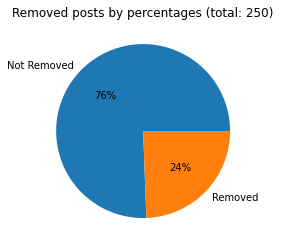

In [13]:
#Cheking the percentage of posts removing in general view

status = new_df["Removed"]

general_removal_view = status.value_counts() #get general info about the removal process of platforms

general_removal_view = general_removal_view.plot(kind = "pie" , autopct='%1.0f%%', title = "Removed posts by percentages (total:" + " "+ str(sum(status.value_counts()))+ ")") 

general_removal_view.get_yaxis().set_visible(False)


plt.savefig("content_removal_stat.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)



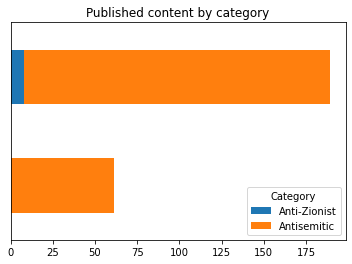

In [7]:

outpot_category_removal_stats_group = new_df.groupby(['Removed', 'Category'])['Category'].count().unstack('Category').fillna(0).astype(int).reindex(index = ['Removed','Not Removed'])
outpot_category_removal_stats = outpot_category_removal_stats_group.astype("int").plot(kind='barh', stacked=True,mark_right = True, title = "Published content by category")

outpot_category_removal_stats.get_yaxis().set_visible(False)

plt.savefig("content_removal_stat_categoty.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)


In [8]:
precentage_chart = outpot_category_removal_stats_group/outpot_category_removal_stats_group[outpot_category_removal_stats_group.columns].sum()*100
precentage_chart = precentage_chart.round(1).astype(str) +'%'


dfi.export(precentage_chart,"precentage_chart_plot.png")



In [21]:
outpot_category_removal_stats_group
dfi.export(outpot_category_removal_stats_group,"num_chart_plot.png")


In [29]:
#A full pdf report extraction

from matplotlib.backends.backend_pdf import PdfPages
from fpdf import FPDF

pdf = FPDF()

pdf.add_page()

pdf.set_font('Arial', 'b', size = 16)

pdf.cell(40)

pdf.cell(75, 10,'Report for media:' + " "  + " "+ first_day + " " + "|" + " " +last_day , 0, 2, 'C')

pdf.cell(90, 20, '', 0, 2, 'C')
pdf.cell(-15)

pdf.image("content_category_in_the_web.png")

pdf.cell(90, 20, '', 0, 2, 'C')
pdf.cell(-3)

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(-3)

pdf.image("content_removal_stat.png")

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(-10)

pdf.image("content_removal_stat_categoty.png")

pdf.cell(100, 10, '', 0, 2, 'C')
pdf.cell(10)

pdf.cell(100, 10, '', 0, 2, 'C')
pdf.cell(17)

pdf.cell(180, 10, '', 0, 2, 'C')



pdf.image("precentage_chart_plot.png")

pdf.cell(100, 20, '', 0, 2, 'C')
pdf.cell(-1)

pdf.cell(100, 10, '', 0, 2, 'C')
pdf.cell(-0.5)

pdf.image("num_chart_plot.png")


pdf.output("Report for media.pdf")


os.startfile("Report for media.pdf")
